**Course**: [_Systèmes dynamiques en biologie_](https://moodle.epfl.ch/course/info.php?id=14291) (BIO-341)

**Professor**: _Felix Naef_

SSV, BA5, 2022


In [1]:
#import important libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
from scipy.integrate import odeint
set_matplotlib_formats('png', 'pdf')
matplotlib.rc('image', cmap='RdBu')
from matplotlib.lines import Line2D
import matplotlib.animation as animation
import random

/var/folders/0n/3fx_dk3974l5gcd61jbvt2200000gr/T/ipykernel_1971/1195999705.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf')


# Traveling wave solutions in 1D reaction-diffusion equations

A front solution in a one-dimensional partial differential equation (PDE) is a solution of the form $u(x,t)=U(x-ct)$ with boundary conditions on $U(-\infty)$ and $U(+\infty)$. In this session, we will study the existence of front solutions for the reaction-diffusion equations using simulations, 2D phase portraits, and a mechanical analogy.

We will study the following PDE

\begin{equation}
\frac{\partial u}{\partial t} = g(u) +\frac{\partial^2 u}{\partial x^2}~
\end{equation}
with
$g(u)= 2 \sin(2\pi u) \left( \sin^2( \pi u) - \alpha \right)$ and $0 < \alpha < 1$.

1) Rewrite the system using the ansatz $u(x,t)=U(x-ct)$ 

> 1) With $z=x-ct$:
\begin{equation}
-c\frac{\partial U}{\partial z} = g(U) +\frac{\partial^2 U}{\partial z^2}~
\end{equation}

From now on we will focus only on $U\in[0,1/2]$.

We want waves with boundary conditions $U(-\infty)=U_L=0$ and $U(\infty)=U_R=1/2$.

2) Transform the second order differential equation into a system of two first order ODEs.

>2) With $V=\frac{\partial U}{\partial z}$ we have:
\begin{align}
\frac{\partial U}{\partial z}&=V\\
\frac{\partial V}{\partial z}&=-cV - g(U)
\end{align}

3) Compute the nullclines and find the stability of the two extremal fixed points.

>3) The nullclines are:
\begin{align}
\frac{\partial U}{\partial z}&=0 \to V=0\\
\frac{\partial V}{\partial z}&=0 \to V =- \frac{g(U)}{c}
\end{align}
The jacobian is:
\begin{equation}
				J=\begin{pmatrix}
				0 & 1 \\
				-g'(U) &-c \end{pmatrix}
\end{equation}


>There are two extremal fixed points in $U=0$, $U=1/2$ (the third fixed point satisfies $\sin(\pi U)=\sqrt{\alpha}$ with $U \in (0,1/2)$).

>We can easily calculate the determinant of the Jacobian matrix:

\begin{equation}
|J|=g'(U)=- 2\pi\cos(4\pi U) - \pi\alpha\cos(2\pi U)
\end{equation}

>$g'(U_R)<0$ and $g'(U_L)<0$ thus they are both saddle points.


4) Simulate the system and plot the 2D phase portraits, for $\alpha = 1/2$, $\alpha < 1/2$ and $\alpha > 1/2$ in the range $0 < \alpha < 1$. For each value of $\alpha$ also vary $c$ and look for the value $c^*$in which you find a trajectory connecting the two saddle points, called *heteroclinic orbit*.

*Hint 1*: in order to find the $c^*$ set the initial conditions around the unstable direction of the saddle points, you can numerically find the eigendirections using Python. Note that $c^*$ is positive for $\alpha > 0.5$ and negative for $\alpha < 0.5$. (Be careful, this is true only for the initial conditions we have chosen!).

*Hint 2*: integrate for $T\leq5$.

In [2]:
def g(x, alpha):
    if(alpha>1): alpha=1
    if(alpha<0): alpha=0
    return 2*np.sin(2*np.pi*x) * ( np.sin(np.pi*x)**2 - alpha )
def g_prime(x, alpha):
    if(alpha>1): alpha=1
    if(alpha<0): alpha=0
    return (4-2*alpha)*np.pi*np.cos(2*np.pi*x)-2*np.pi*np.cos(4*np.pi*x)
def Ynull(u,v):
    return -c*v-g(u,alpha)

In [3]:
def model(X_0, t, c, g, alpha):
    Xdot=X_0[::-1]#take the input array in reverse order
    Xdot[1]=(-c*X_0[1]-g(X_0[0],alpha))
    return Xdot

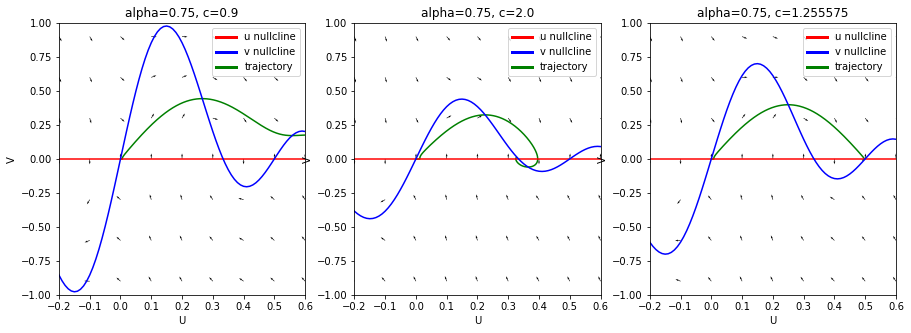

In [7]:
alpha=0.75

t=np.linspace(0,5,1000)

#nullclines
u1=np.arange(-2.5,2.5,0.01)
v1=u1*0
X,Y=np.meshgrid(u1,u1)

#here the vector field
uq=np.arange(-2.1,2.1,0.1)
vq=np.arange(-2.1,2.1,0.3)
up, vp=np.meshgrid(uq,vq)

cstar=1.255575#1.25506#1.255602245581986

fig,axs = plt.subplots(1, 3, figsize=(15,5))

i=0
for c in np.array([0.9,2,cstar]):
    
    J0=np.array([[0,1],[-g_prime(0,alpha),-c]])
    
    X0=np.real(-(np.linalg.eig(J0)[1][:,1])/500)
    
    sol = odeint(model, X0, t, args=(c, g, alpha))
    
    axs[i].plot(sol[:,0],sol[:,1],color='g', label='c='+str(c))
    Ynul=Ynull(X,Y)
    du, dv= model([up, vp],t,c,g,alpha)
    du, dv=du/np.sqrt(du**2+dv**2), dv/np.sqrt(du**2+dv**2)
    axs[i].plot(u1,v1,'r', label='u nullcline')
    
    CS=axs[i].contour(X,Y,Ynul,0, colors='b')
    axs[i].quiver(up,vp,du,dv)
    
    axs[i].set_xlim(-0.2,0.6)
    axs[i].set_ylim(-1,1)
    axs[i].set_xlabel('U')
    axs[i].set_ylabel('V')
    axs[i].set_title('alpha='+str(alpha)+', c='+str(c))
    legend_elements=[Line2D([0], [0], color='r', label='u nullcline',lw=3),
                     Line2D([0], [0], color='b', label='v nullcline',lw=3),
                     Line2D([0], [0], color='g', label='trajectory',lw=3)]
    axs[i].legend(handles=legend_elements)
    i+=1
    
plt.show()

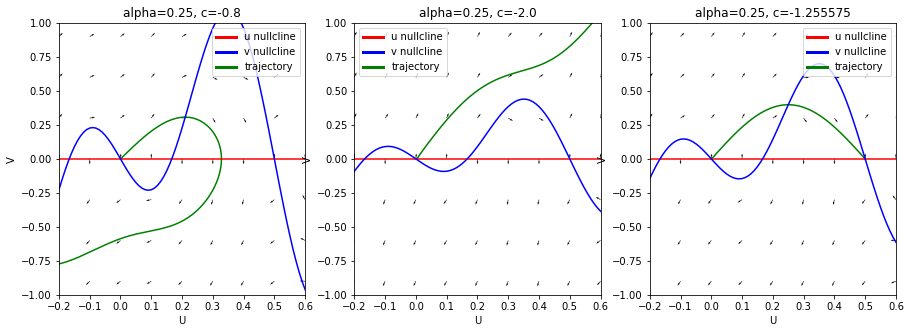

In [8]:
alpha=0.25
t=np.linspace(0,5,1000)
#nullclines
u1=np.arange(-5,5,0.01)
v1=u1*0
X,Y=np.meshgrid(u1,u1)
#here the vector field
uq=np.arange(-2.1,2.1,0.1)
vq=np.arange(-2.1,2.1,0.3)
up, vp=np.meshgrid(uq,vq)
cstar=-1.255575

fig,axs = plt.subplots(1, 3, figsize=(15,5))
i=0
for c in np.array([-0.8,-2,cstar]):
#here the trajectories
    J0=np.array([[0,1],[-g_prime(0,alpha),-c]])
    X0=np.real((np.linalg.eig(J0)[1][:,0])/500)
    
    sol = odeint(model, X0, t, args=(c, g, alpha))
    axs[i].plot(sol[:,0],sol[:,1],color='g', label='c='+str(c))
    Ynul=Ynull(X,Y)
    du, dv= model([up, vp],t,c,g,alpha)
    du, dv=du/np.sqrt(du**2+dv**2), dv/np.sqrt(du**2+dv**2)
    axs[i].plot(u1,v1,'r', label='u nullcline')
    #plt.plot(u2,v2,'b', label='v nullcline')
    CS=axs[i].contour(X,Y,Ynul,0, colors='b')
    axs[i].quiver(up,vp,du,dv)
    #plt.axis('scaled')
    axs[i].set_xlim(-0.2,0.6)
    axs[i].set_ylim(-1,1)
    axs[i].set_xlabel('U')
    axs[i].set_ylabel('V')
    axs[i].set_title('alpha='+str(alpha)+', c='+str(c))
    legend_elements=[Line2D([0], [0], color='r', label='u nullcline',lw=3),
                     Line2D([0], [0], color='b', label='v nullcline',lw=3),
                     Line2D([0], [0], color='g', label='trajectory',lw=3)]
    axs[i].legend(handles=legend_elements)
    i+=1
plt.show()

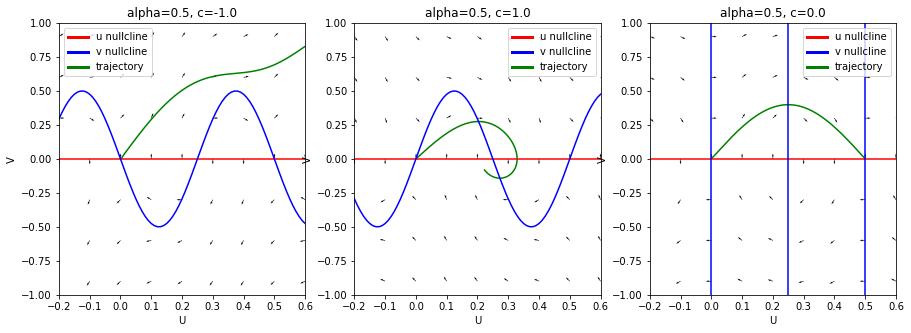

In [9]:
alpha=0.5
t=np.linspace(0,5,1000)
#nullclines
u1=np.arange(-5,5,0.01)
v1=u1*0
X,Y=np.meshgrid(u1,u1)
#here the vector field
uq=np.arange(-2.1,2.1,0.1)
vq=np.arange(-2.1,2.1,0.3)
up, vp=np.meshgrid(uq,vq)
cstar=0.

fig,axs = plt.subplots(1, 3, figsize=(15,5))
i=0
for c in np.array([-1,1,cstar]):
#here the trajectories
    J0=np.array([[0,1],[-g_prime(0,alpha),-c]])
    X0=np.abs(np.real((np.linalg.eig(J0)[1][:,0])/500))
    
    sol = odeint(model, X0, t, args=(c, g, alpha))
    axs[i].plot(sol[:,0],sol[:,1],color='g', label='c='+str(c))
    Ynul=Ynull(X,Y)
    du, dv= model([up, vp],t,c,g,alpha)
    du, dv=du/np.sqrt(du**2+dv**2), dv/np.sqrt(du**2+dv**2)
    axs[i].plot(u1,v1,'r', label='u nullcline')
    #plt.plot(u2,v2,'b', label='v nullcline')
    CS=axs[i].contour(X,Y,Ynul,0, colors='b')
    axs[i].quiver(up,vp,du,dv)
    #plt.axis('scaled')
    axs[i].set_xlim(-0.2,0.6)
    axs[i].set_ylim(-1,1)
    axs[i].set_xlabel('U')
    axs[i].set_ylabel('V')
    axs[i].set_title('alpha='+str(alpha)+', c='+str(c))
    legend_elements=[Line2D([0], [0], color='r', label='u nullcline',lw=3),
                     Line2D([0], [0], color='b', label='v nullcline',lw=3),
                     Line2D([0], [0], color='g', label='trajectory',lw=3)]
    axs[i].legend(handles=legend_elements)
    i+=1
plt.show()

## The mechanical analogy

5) Discuss the analogy of the PDE for $U$ with the Newton equation.

>5) This is equivalent to the Newton equation (here $z$ takes the role of the time variable, that is, the 'acceleration' is $d^2U/dz^2$) for a mass $m=1$ under a friction force ($c$ is the friction coefficient) and an external force $G(U)=-g(u)=-\frac{dW}{dU}$, where $W(U)$ is the respective potential.

6) Let $G(U)=-g(u)$. Introducing the potential function $W(U)=-\int G(U) dU$, derive $W(U)$ for the above case.

>6)  $W(U)=-\int G(U) dU = \int g(U) dU = \frac{2 \alpha -1}{2 \pi} \cos(2 \pi U) + \frac{1}{8 \pi} \cos(4 \pi U)$

7) Think of a ball rolling in the potential $W(U)$ starting at $U=U_L=0$ with an infinitely small perturbation to the right. For $\alpha=1/2$, describe the trajectory of the ball for $c > 0$. What happens for $c=0$?
    

>7) For $\alpha=1/2$ and $c=0$ (no friction), the ball stops in $U=U_R=1/2$. For $c>0$, the ball oscillates and stops at $U=1/4$.

8) Here, we consider the case $c\geq0$. What can you say about the potential difference between the two states $U_L$ and $U_R$ in the case $1/2 < \alpha < 1$ and $0 < \alpha < 1/2$? In which of the cases the ball will move from $U_L$ and $U_R$? Is this in agreement with the hint of question 4) regarding the signs of $\alpha$ and $c^*$?

>8) The potential difference between the two saddle points: 

\begin{equation}
W_{LR}=W(U_L)-W(U_R)=\begin{cases}
\Delta W_{LR}>0 \quad \alpha >1/2\\
\Delta W_{LR}<0 \quad \alpha <1/2\\
\end{cases}
\end{equation}

>From mechanics we know that systems tend to decrease their energy, in this case their potential energy (potential energy=potential x mass). So a ball will move from $U_L$ to $U_R$ only if  $W_{LR}>0$, so only if $\alpha>1/2$.
This is in accordance with the fact that $c\ge0$ and with the hint given in question 4).


>What we have stated can be seen also as follows:
since we want $c\ge 0$ to have a significant mechanical analogy, if we choose $\alpha>1/2$ ($\alpha<1/2$) only boundary conditions such that $U_L<U_R$ ($U_L>U_R$) allow an heteroclinic orbit.

>Once $\alpha\neq1/2$ is chosen, the system can only evolve with time in one direction and if we try to force the wrong boundary conditions we will have $c<0$ which means that what we are inverting the boundary condition for the time evolution, keeping the consistence with the idea that we go from high to low potential as time passes.

